# LIBS

In [23]:
#import user modules
import helper_functions as hfun
import config as cf
import thouless_times as thouless
import importlib
importlib.reload(thouless)
importlib.reload(hfun)
importlib.reload(cf)

#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors

print(cf.base_directory)


../results/Heisenberg/symmetries/PBC/


# MODEL INPUT AND OTHER INFO

In [24]:
base_info = hfun.info(cf.L, cf.J, cf.J0, cf.g, cf.g0, cf.h, cf.w, cf.k_sym, cf.p_sym, cf.x_sym)
print(base_info)
print(hfun.remove_info(base_info, 'g', 'w', 'L'))
hfun.print_vars(cf.params_arr, cf.names)


$_L=14,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.80,w=1.00$_.dat
$,J=1.00,J0=0.00,g0=0.00,h=0.80
L=14
J=1.00
g=0.55
h=0.80
w=1.00
k=0
p=1
x=1
J0=0.00
x0=0.00


# SPECTRAL FORM FACTOR

# THOULESS TIME

### PLOT DATA

In [25]:
skip = 1
if skip == 0:
    #--- set initial plot settings
    fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2)
    fig.set_size_inches(18,18)
    thouless.plot(axis1, axis2)

    x = np.array(range(-10000, 10000)) / 100.
    sclabel = cf.plot_settings.settings['vs']
    if cf.plot_settings.settings['vs_idx'] == 2:
        sclabel = hfun.var_name
    n = 2.0; axis1.plot(cf.plot_settings.rescale(x, 'x'), (4e0 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
    #n = 2.5; axis1.plot(cf.plot_settings.rescale(x, 'x'), (5e4 / (x)**n), ls='--', color='blue', label=r"${%s}^{-%.2f}$"%(sclabel, n))
    #a=4.0;  axis1.plot(cf.plot_settings.rescale(x, 'x'), 6e5*np.exp(a * (x - cf.parameter_critical)**1 + a), ls='--', color='black', label=r"$exp(%.2f\cdot(%s-%s_c))$"%(a,sclabel,sclabel))
    #a=-6.0;  axis1.plot(cf.plot_settings.rescale(x, 'x'), 1.3e1*np.exp(a * x**1 - a), ls='--', color='blue', label=r"$exp(-%.2f \cdot %s)$"%(a,sclabel))
    #axis1.plot(cf.plot_settings.rescale(x, 'x'), 1.2e1*np.exp(0.6 / x**2 - 1), ls='--', color='black', label=r"$exp(-0.6 /\ {%s}^2)$"%sclabel)

    #axis1.set_xlim([cf.plot_settings.rescale(1e-8, 'x'), cf.plot_settings.rescale(1.5, 'x')])
    #axis2.set_xlim(-0.05, 0.1)
    axis1.set_xlim(5e-2, 1e0)
    axis1.legend()
    axis2.axvline(x=0.0, color='k', linestyle='--')

    new_settings = cf.plot_settings
    new_settings.set_vs('L')
    new_settings.set_scaling('J')
    new_settings.set_x_rescale(rescale = 0)
    new_settings.set_scales(xscale = 'log', yscale = 'log')
    #cf.set_params(_g=0.55)
    thouless.plot(axis3, axis4, new_settings.settings)

    def heisenberg_time(system_size):
        dim = 2**system_size
        chi = 0.341345
        return (chi * dim) / ( system_size**(0.5)  * np.sqrt(cf.J * cf.J + cf.h * cf.h + cf.g * cf.g + (cf.w * cf.w + cf.g0 * cf.g0 + cf.J0 * cf.J0) / 3.) )
    x = np.array(range(10, 19)).astype(np.float)
    sclabel = new_settings.settings['vs']
    n = 2;  axis3.plot(cf.plot_settings.rescale(x, 'x'), (8e0* (x/10.)**(n)), ls='--', color='red', label=r"${%s}^{%d}$"%(sclabel, n))
    n = 5;  axis3.plot(cf.plot_settings.rescale(x, 'x'), (1e1* (x/10.)**(n)), ls='--', color='black', label=r"${%s}^{%d}$"%(sclabel, n))
    axis3.plot(cf.plot_settings.rescale(x, 'x'), heisenberg_time(x), ls=':', color='gray', label=r"$t_H$")
    axis3.legend()
    plt.show()

    print(np.log(10) / np.log(1.6))

OSError: ../results/Heisenberg/symmetries/PBC/ThoulessTime/_all,p=1,x=1.dat not found.

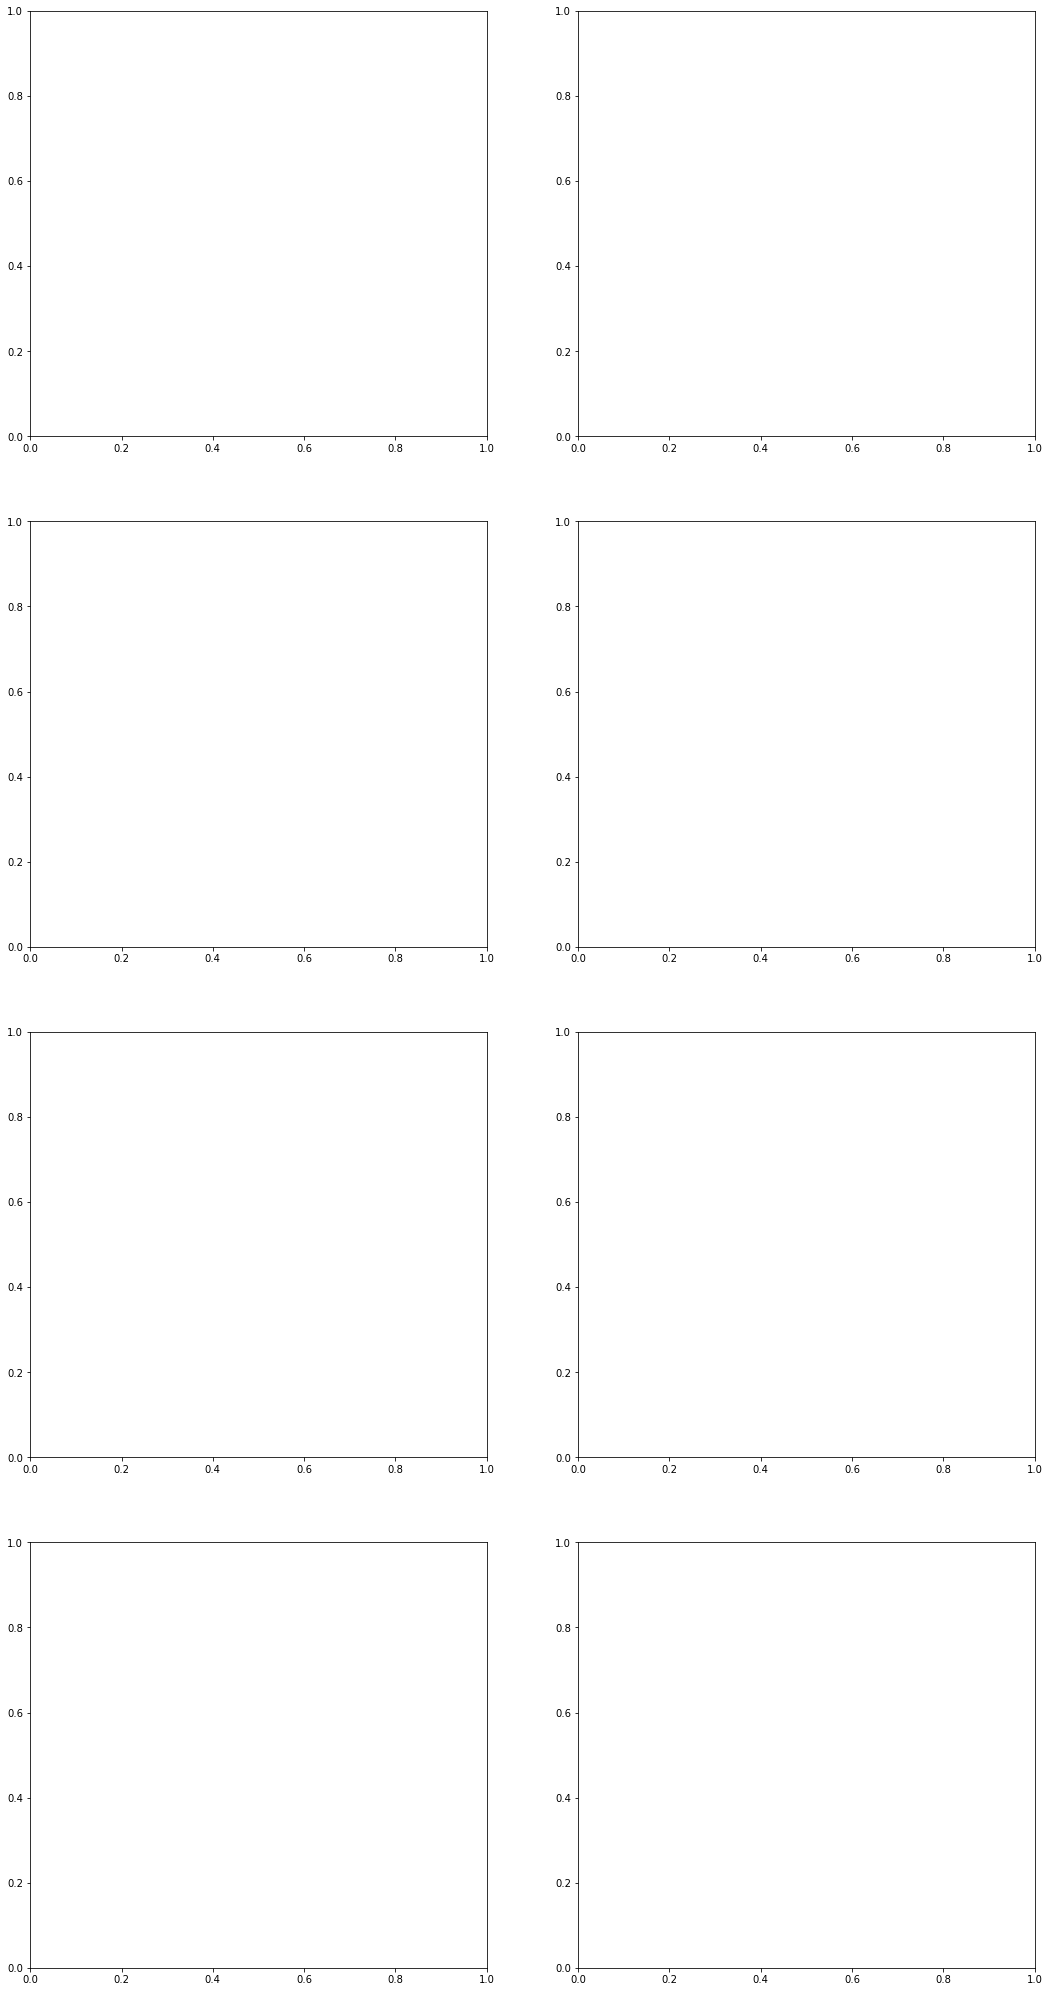

In [26]:
fig, ((axis1, axis2), (axis3, axis4), (axis5, axis6), (axis7, axis8)) = plt.subplots(nrows=4,ncols=2)
axes = ((axis1, axis2), (axis3, axis4), (axis5, axis6), (axis7, axis8))
fig.set_size_inches(18,36)

x = np.array(range(-10000, 10000)) / 100.
sclabel = cf.plot_settings.settings['vs']
if cf.plot_settings.settings['vs_idx'] == 2:
    sclabel = hfun.var_name

thouless.plot(axis1=axis1, axis2=axis2, use_scaling_ansatz=1, scaling_ansatz='classic', crit_fun='free');  
n = 2.0; axis1.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
axis1.legend()
axis1.set_xlim(1e-2, 1.0e0);  axis2.set_xlim(-40, 30);

thouless.plot(axis1=axis3, axis2=axis4, use_scaling_ansatz=1, scaling_ansatz='FGR', crit_fun='free')
n = 2.0; axis3.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
axis3.legend()
axis3.set_xlim(1e-1, 2e0);  axis4.set_xlim(-10, 30);

new_settings = cf.plot_settings
new_settings.set_scales(xscale = 'linear', yscale = 'log')
thouless.plot(axis1=axis5, axis2=axis6, use_scaling_ansatz=1, scaling_ansatz='RG', crit_fun='free', new_settings=new_settings.settings)
n = 2.0; axis5.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
axis5.legend()
#axis5.set_xlim(1e-2, 2e0);  axis6.set_xlim(-5, 20);

thouless.plot(axis1=axis7, axis2=axis8, use_scaling_ansatz=1, scaling_ansatz='KT', crit_fun='free', new_settings=new_settings.settings)
n = 2.0; axis7.plot(cf.plot_settings.rescale(x, 'x'), (1e1 / (x)**n), ls='--', color='black', label=r"${%s}^{-%.2f}$"%(sclabel, n))
axis7.legend()
#axis7.set_xlim(1e-1, 2e0);  axis8.set_xlim(-6, 15);



for ax in axes:
    ax[1].axvline(x=0.0, color='k', linestyle='--')


In [ ]:
#xit.exit()
from costfun import costfun as cost
importlib.reload(cost)
np.set_printoptions(edgeitems=25, linewidth=100000)

user_settings = getattr(cf.plot_settings, 'settings')
vals, xvals, tau, gap_ratio = thouless.load()
num_of_plots = len(tau)

def get_cost(scaling_ansatz, crit_fun = 'free'):
    params = [0,0,0,0,0,0]
    x_max=None
    for x in xvals: 
        for _x_ in x: 
            if x_max is None or _x_ > x_max: x_max = _x_
    x_min = 0 if crit_fun == 'free' else -x_max
    bounds = [ (-10.0, 10.0), (x_min, x_max)]
    num_of_param = 0
    if crit_fun == 'free': 
        num_of_param = len(vals) - 1
    elif crit_fun == 'power_law' or crit_fun == 'inv': 
        num_of_param = 2;
    elif crit_fun == 'const':
        num_of_param = 0
    else: 
        num_of_param = 1
    for i in range(num_of_param): bounds.append((x_min, x_max))
    for r in range(1):
        params, cost_fun = cost.cost_func_minization(x=xvals, y=gap_ratio, sizes=vals, 
                                    scale_func=scaling_ansatz, 
                                    crit_func=crit_fun,
                                    bnds=bounds,
                                    population_size=1e2,
                                    maxiterarions=1e3, workers=10, realisations=1
                                )
        #print(r, cost_fun, params)
    print(scaling_ansatz, crit_fun, cost_fun, params)
    return params

ansatz_list = ['classic', 'FGR', 'RG', 'KT']
params_free = []
params_inv = []
for ansatz in ansatz_list:
    params_free.append(get_cost(scaling_ansatz=ansatz, crit_fun='free'))
    params_inv.append(get_cost(scaling_ansatz=ansatz, crit_fun='inv'))
    


classic free 0.07773582818182989 [1.549332   1.04130353 0.96227636 0.89773698 0.84380251 0.79403777 0.75318108]
classic inv 0.08059854236678543 [1.55739764 0.18346815 0.27387651 0.13940249]
FGR free 0.07231464962867595 [3.00840316 0.64745695 0.62423822 0.59800059 0.58049825 0.55597304 0.53561998]
FGR inv 0.08684949314746526 [ 2.81150433  0.43392132  1.28709192 -0.69030508]
RG free 0.07884219115186086 [0.64437763 0.84390642 0.79284872 0.74537997 0.70819175 0.67237464 0.64248235]
RG inv 0.09127494502759137 [0.65282176 0.23574729 0.26289732 0.17670478]
KT free 0.12298607365611525 [1.69850759 1.48796092 1.3851949  1.29748723 1.22920449 1.16722075 1.11459926]
KT inv 0.09924075841181623 [ 1.81466473  0.11982041  1.11844802 -0.25481168]


[1.04130353 0.96227636 0.89773698 0.84380251 0.79403777 0.75318108]
[0.18346815 0.27387651 0.13940249]
[0.64745695 0.62423822 0.59800059 0.58049825 0.55597304 0.53561998]
[ 0.43392132  1.28709192 -0.69030508]
[0.84390642 0.79284872 0.74537997 0.70819175 0.67237464 0.64248235]
[0.23574729 0.26289732 0.17670478]
[1.48796092 1.3851949  1.29748723 1.22920449 1.16722075 1.11459926]
[ 0.11982041  1.11844802 -0.25481168]


(0.0, 2.0)

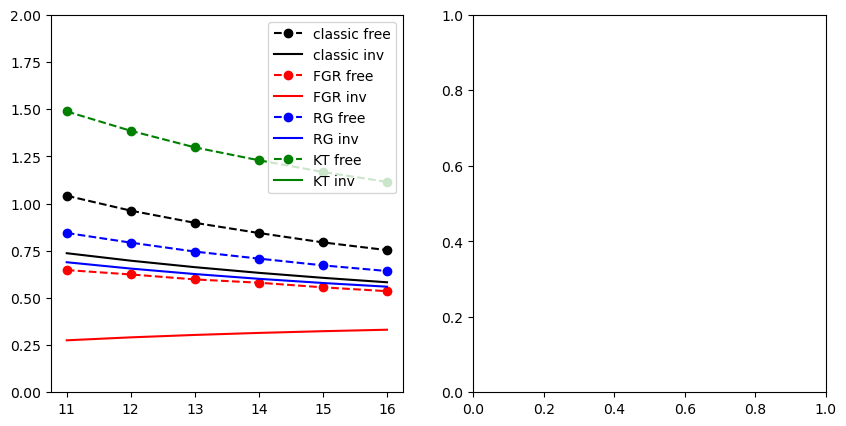

In [ ]:
fig, (ax1, ax2)= plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 100)

def plot_params(params, color='black', lab=''):
    crit_pars = np.array(params[1:])
    print(crit_pars)
    #for i in range(len(vals)):
    ax1.plot(vals, crit_pars, color=color, label=lab, linestyle='--', marker='o')
colors = ['black', 'red', 'blue', 'green']
def crit(x, crit_pars):
    #return crit_pars[0] + crit_pars[1] * x
    return crit_pars[0] + 1.0 / ( crit_pars[1] + crit_pars[2] * x)
for i in range(0,len(ansatz_list)):
    plot_params(params_free[i], colors[i], ansatz_list[i] + ' free')
    crit_pars = np.array(params_inv[i][1:])
    print(crit_pars)
    ax1.plot(vals, crit(vals, crit_pars), color=colors[i], label=ansatz_list[i] + ' inv')
ax1.legend()
#ax.plot(vals, crit_pars)
ax1.set_ylim(0,2)